In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [2]:
df=pd.read_csv(r"/Users/priyankamalavade/Desktop/Book_recommendation_system_mini_project/data/cleaned_book_data.csv")
print(df.head())
print(df.info())
print(df.duplicated().sum())
print(df.isnull().sum())

                                           Book Name          Author  \
0  Think Like a Monk: The Secret of How to Harnes...      Jay Shetty   
1  Ikigai: The Japanese Secret to a Long and Happ...   Héctor García   
2  The Subtle Art of Not Giving a F*ck: A Counter...     Mark Manson   
3  Atomic Habits: An Easy and Proven Way to Build...     James Clear   
4  Life's Amazing Secrets: How to Find Balance an...  Gaur Gopal Das   

                                         Description  Rating  \
0  Over the past three years, Jay Shetty has beco...     4.9   
1                         Brought to you by Penguin.     4.6   
2  In this generation-defining self-help guide, a...     4.4   
3                         Brought to you by Penguin.     4.6   
4  Stop going through life,  Start growing throug...     4.6   

   Number of Reviews    Price  Rank                             Genre  \
0              342.0  10080.0     1         Society & Culture (Books)   
1             3670.0    615.0     2 

In [3]:


# Text preprocessing (tokenization, stopword removal, lemmatization)
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

df['cleaned_description'] = df['Description'].apply(preprocess_text)


In [5]:
# Vectorizing text using TF-IDF
tfidf = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf.fit_transform(df['cleaned_description'])


In [6]:
# K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(tfidf_matrix)


In [7]:
# Dimensionality reduction for visualization (PCA)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix.toarray())


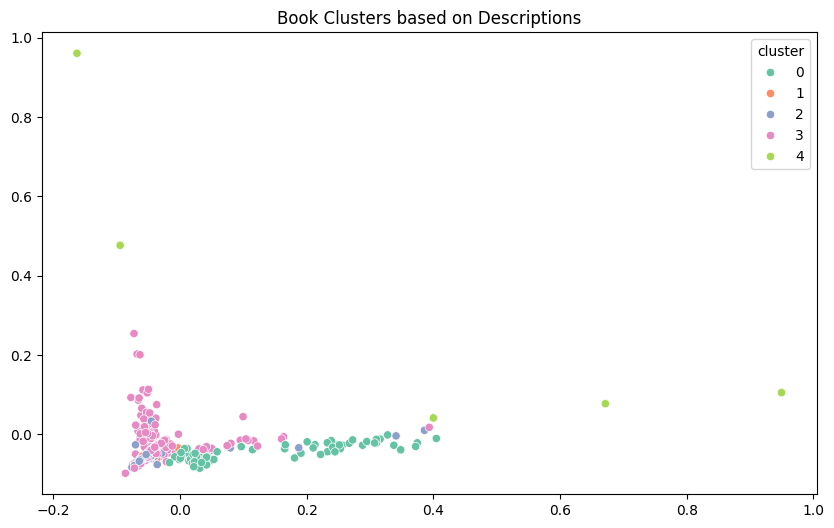

In [8]:
# Visualizing the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['cluster'], palette='Set2')
plt.title('Book Clusters based on Descriptions')
plt.show()

In [11]:
df.head(2)

,Book Name,Author,Description,Rating,Number of Reviews,Price,Rank,Genre,Listening Time (minutes),cleaned_description,cluster
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,"Over the past three years, Jay Shetty has beco...",4.9,342.0,10080.0,1,Society & Culture (Books),654.0,over past three year jay shetty become one wor...,3
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,Brought to you by Penguin.,4.6,3670.0,615.0,2,Personal Success,203.0,brought penguin,4


In [12]:
df.columns

Index(['Book Name', 'Author', 'Description', 'Rating', 'Number of Reviews',
       'Price', 'Rank', 'Genre', 'Listening Time (minutes)',
       'cleaned_description', 'cluster'],
      dtype='object')

In [13]:
df.drop(columns=['Description'], inplace=True)

In [14]:
df.to_csv("/Users/priyankamalavade/Desktop/Book_recommendation_system_mini_project/data/books_with_clusters.csv",index=False)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Book Name                 1642 non-null   object 
 1   Author                    1642 non-null   object 
 2   Rating                    1642 non-null   float64
 3   Number of Reviews         1642 non-null   float64
 4   Price                     1642 non-null   float64
 5   Rank                      1642 non-null   int64  
 6   Genre                     1642 non-null   object 
 7   Listening Time (minutes)  1642 non-null   float64
 8   cleaned_description       1642 non-null   object 
 9   cluster                   1642 non-null   int32  
dtypes: float64(4), int32(1), int64(1), object(4)
memory usage: 122.0+ KB
